# Homework 6 Regularization, model selection

## 1. Implement a linear model¶
return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:
y^(w→,x→)=w0+w1x1+⋯+wpxp,
check your returned coefficients with the built in LinearRegression class from the sklearn library, they should be within tolerance 1e-6to each other
use a generated regression dataset from sklearn.dataset import make_regression API with parameters n_samples=1000 and n_features=20

In [6]:
# data packages
import numpy as np
import pandas as pd

#sklearn models
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from warnings import simplefilter
simplefilter(action='ignore')


# Useful packages
from tqdm import tqdm

In [2]:
X, y = make_regression(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Sklearn - Linear Regression

In [18]:
# linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Coefficients
w = lin_reg.coef_
w_0 = lin_reg.intercept_
# Predictions
y_pred1 = lin_reg.predict(X_test)
# Residuals
result_sklearn = y_test - y_pred1

In [53]:
class LinearRegressionMine:
    def __init__(self, lr=1e-04, num_iters=100000):
        self.alpha = lr
        self.iters = num_iters


    def cost_func(self, X, y, coef_):
        m = len(y)
        pred = X @ coef_
        return (1/2*m) * np.sum(np.square(pred-y))


    def gradient_descent(self, X, y):
        self.cost_history = np.zeros(self.iters)
        self.loss_history = np.zeros(self.iters)
        coef_ = self.coef_
        for i in tqdm(range(self.iters)):
            h = X @ coef_
            # Difference
            loss = h - y
            self.loss_history[i] = np.mean(loss)
            # Gradient
            gradient = (X.T @ loss) / len(y)
            # Updating coeffs
            coef_ = coef_ - self.alpha * gradient
            # Calculate cost
            cost = self.cost_func(X, y, coef_)
            self.cost_history[i] = cost
        return coef_


    def fit(self, X, y):
        # Number of features
        self.dimensions = X.shape[1]
        # Initialial coef_
        self.coef_ = np.ones(self.dimensions)

        self.coef_ = self.gradient_descent(X, y)
        self.intercept_ = np.sum(y - X @ self.coef_) / len(y)


    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [64]:
# linear regression
lin_reg2 = LinearRegressionMine(num_iters=250000)
lin_reg2.fit(X_train, y_train)
# Coefficients
w = lin_reg2.coef_
w_0 = lin_reg2.intercept_
# Predictions
y_pred2 = lin_reg2.predict(X_test)
# Residuals
result_mine = y_test - y_pred2

100%|██████████| 250000/250000 [02:34<00:00, 1620.53it/s]


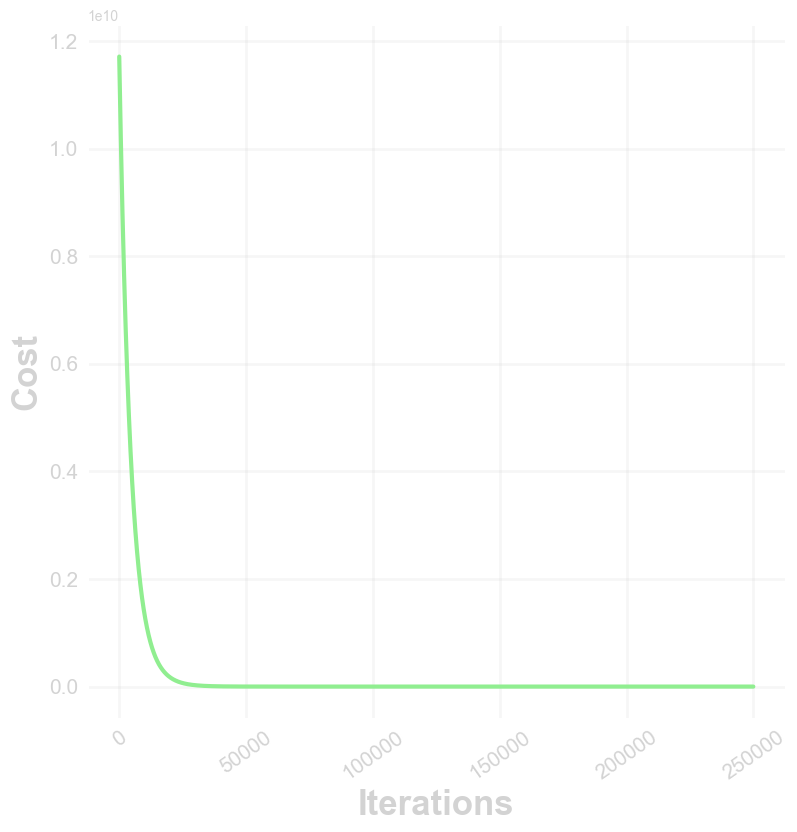

In [65]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*9, nrows*9),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})

axes.plot(lin_reg2.cost_history,
          color='lightgreen', lw=3)

y_label = 'Cost'
axes.set_xlabel('Iterations', fontsize=25, fontweight='semibold', color='lightgrey')
axes.set_ylabel(y_label, fontsize=25, fontweight='semibold', color='lightgrey')
axes.tick_params(axis='both', which='major', labelsize=15, colors='lightgrey')
axes.tick_params(axis='x', which='major', rotation=35)
axes.grid(color='lightgrey', linestyle='-', linewidth=2, alpha=0.2)

Text(0.5, 0.98, 'Difference between predicted and original data')

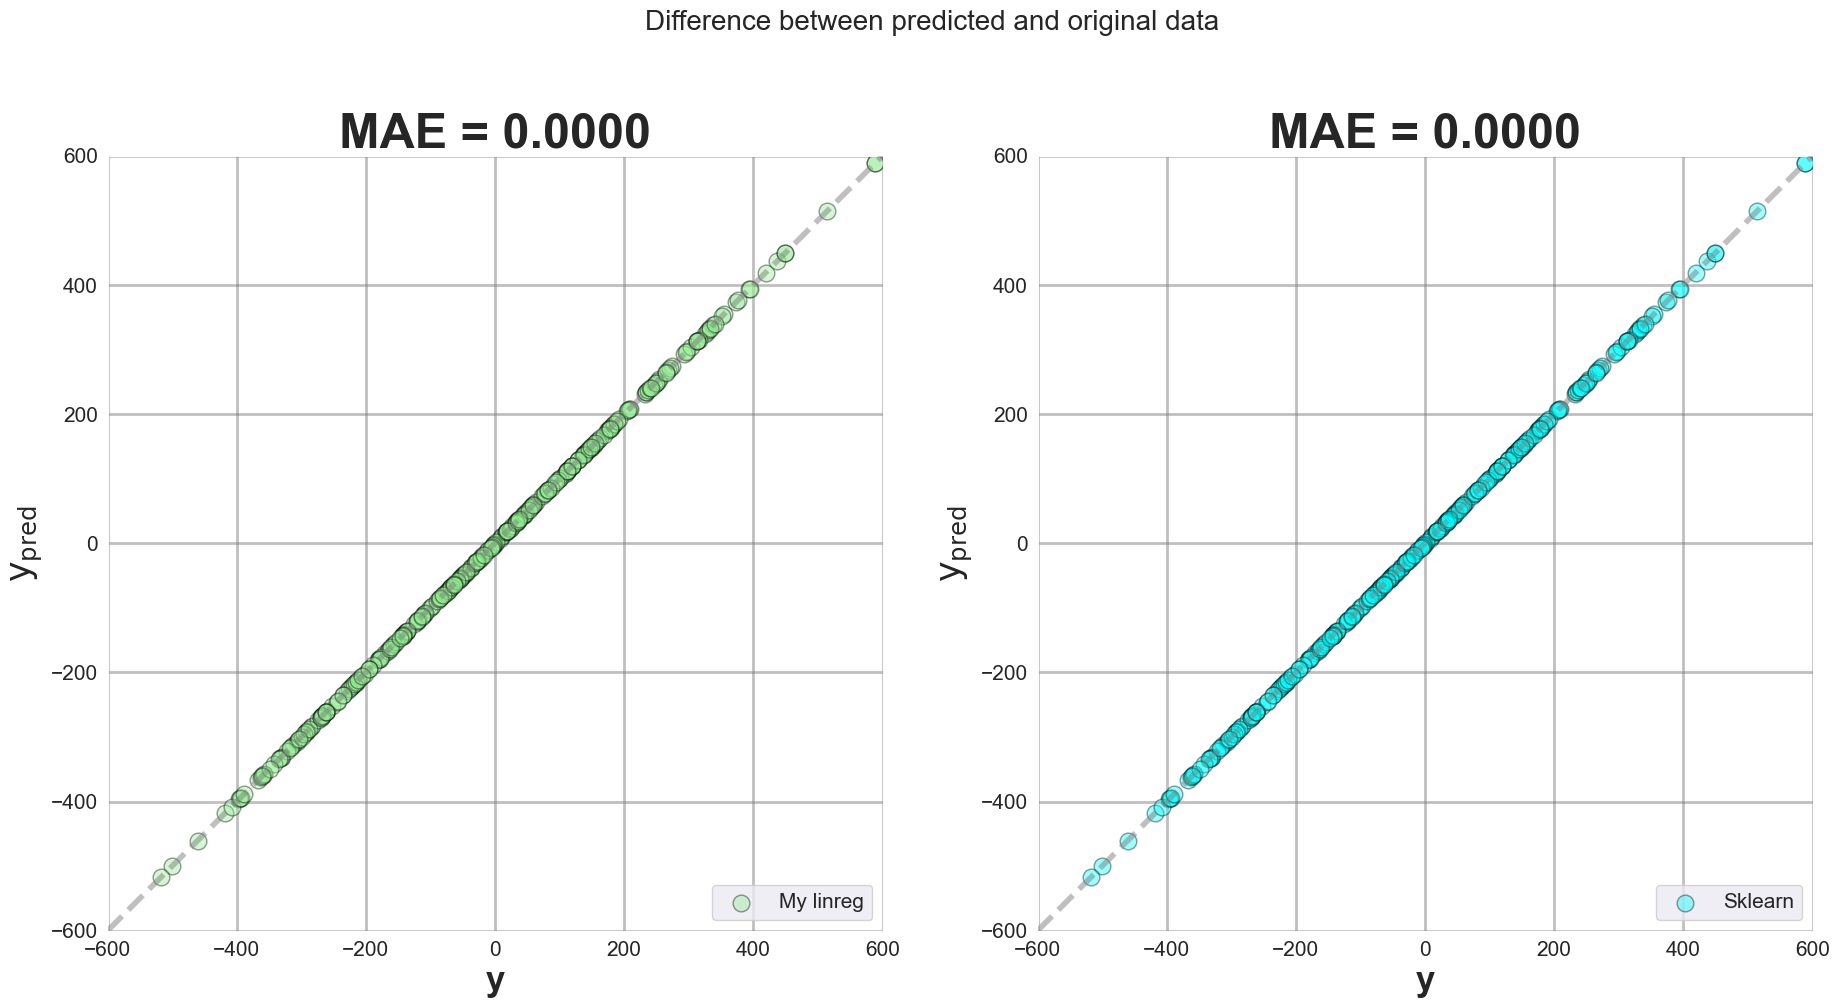

In [66]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*11, nrows*11),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})

sc = 12
ax = axes[0]
ax.scatter(y_test, y_pred2, label='My linreg',
           color='lightgreen', s=sc**2, ec='black', alpha=0.4)
ax = axes[1]
ax.scatter(y_test, y_pred1, label='Sklearn',
           color='cyan', s=sc**2, ec='black', alpha=0.4)

diff = [result_mine, result_sklearn]
for i in range(ncols):
    ax = axes[i]
    ax.set_aspect('equal')
    mae = np.mean(np.abs(diff[i]))
    x_lim = 600
    y_lim = 600
    ax.plot([-x_lim, x_lim], [-y_lim, y_lim],
            color='grey', lw=4, ls='--', zorder=3, alpha=0.5)

    ax.set_xlim(-x_lim, x_lim)
    ax.set_ylim(-y_lim, y_lim)

    ax.set_title(f'MAE = {mae:.4f}', fontsize=35, fontweight='bold', )
    ax.set_xlabel('y', fontsize=25, fontweight='semibold')
    ax.set_ylabel(r'$\mathrm{y_{pred}}$', fontsize=25, fontweight='semibold',)
    ax.tick_params(axis='both', which='major', labelsize=15, )
    ax.grid(color='grey', linestyle='-', linewidth=2, alpha=0.5)

    ax.legend(loc='lower right', fontsize=15)

fig.suptitle('Difference between predicted and original data', fontsize=15+5)

Text(0.5, 0.03, 'Residuals of GD method')

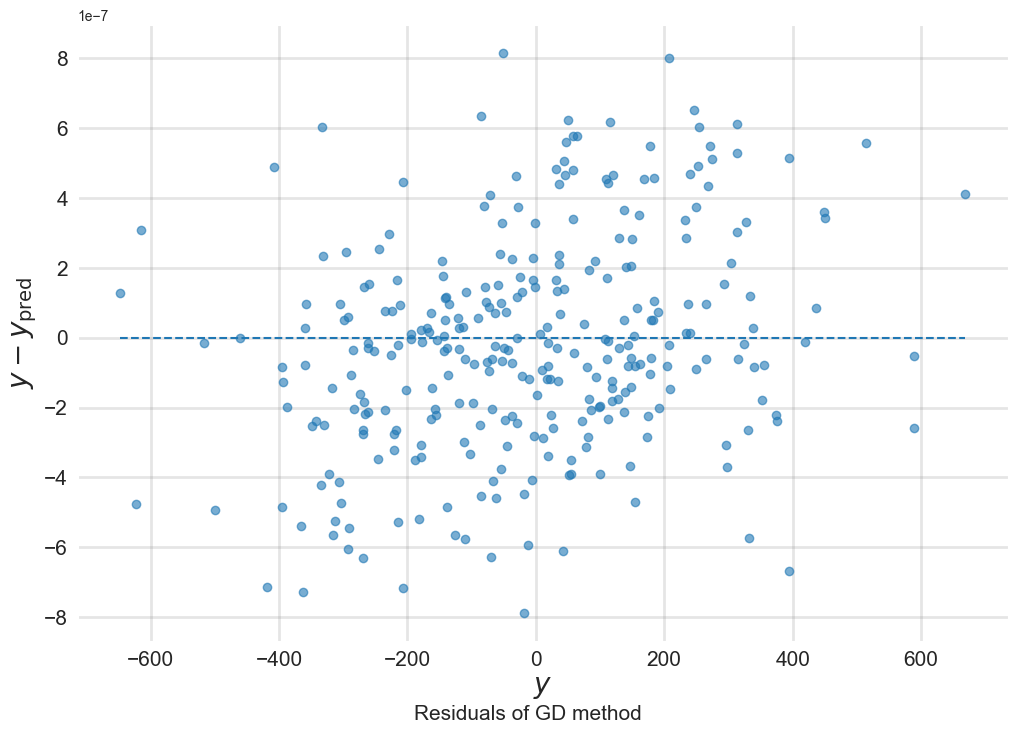

In [67]:
fig, axes = plt.subplots(figsize=(12, 8),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})

axes.scatter(y_test, result_mine, label='Residuals', lw=1, alpha=0.6)

axes.set_xlabel('$y$', fontsize=20, fontweight='bold',)
axes.set_ylabel('$y - y_{\mathrm{pred}}$', fontsize=20, fontweight='bold',)
axes.tick_params(axis='both', which='major', labelsize=15 )
axes.grid(color='grey', linestyle='-', linewidth=2, alpha=0.2)
axes.hlines(xmin=min(y_test), xmax=max(y_test), y=0,  linestyle='--')
fig.suptitle('Residuals of GD method', fontsize=15, y=0.03)

In [68]:
max_diff = np.max(np.abs(y_pred2 - y_pred1))
tolerance = 1e-6
print(f"""
Maximum difference: {max_diff}
Tolerance = {tolerance}
Below or equal compare to tolerance = {max_diff <= tolerance}
""")


Maximum difference: 8.156632631539651e-07
Tolerance = 1e-06
Below or equal compare to tolerance = True



# 2. Use of real data
download the Communities and Crime Data Set from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.

split the data in training/test sets and fit a LinearRegression model with 5-fold cross-validation on top of it - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

fit the best Lasso regression model with 5-fold grid search cross validation (GridSearchCV) on the parameters: alpha, normalize, max_iter and show the best parameters

In [71]:
features = []
with open('data/communities.names') as file:
    for line in file:
        if line.startswith("@attribute"):
            features.append(line.strip().split()[1])
features

['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

In [74]:
raw = pd.read_csv('data/communities.data', sep=',', names=features, na_values=['?'])
raw

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

The first 4 column are locational data. (state, county, community, communityname).
The fold column is cross-validation with only 10 value, so
I deleted them.

In [136]:
cleaned_df = raw[features[5:]]
cleaned_df.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20       0.06           0.04   
1      0.02     0.12            0.45        NaN            NaN   
2      0.01     0.21            0.02        NaN            NaN   
3      0.02     0.39            0.28        NaN            NaN   
4      0.04     0.09            0.02        NaN            NaN   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                  0.9                  0.5                 0.32   
1                  NaN                  NaN                 0.00   
2                  NaN                  NaN                 0.00   
3                  NaN                  NaN                 0.00   
4                  NaN                  NaN                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0             0.14                 0.20  
1              NaN                 0.67  
2              NaN                 0.43  
3              NaN                 0.12  
4              NaN                 0.03  

[5 rows x 123 columns]

Now we will check where are the missing values in plots to see if Nan values are randoms.

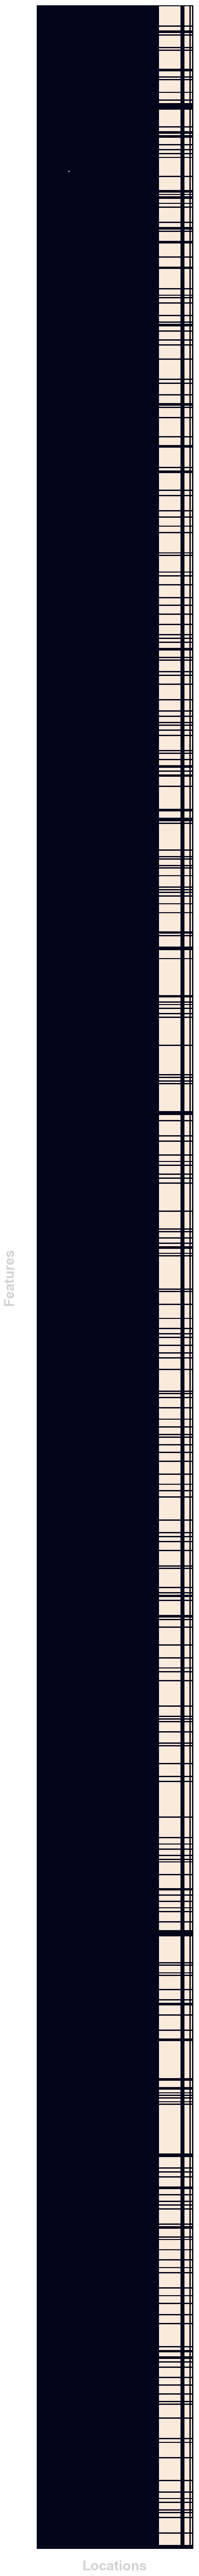

In [137]:
fig, axes = plt.subplots(figsize=(100,100), facecolor='None')
axes.set_aspect('equal')
axes.grid(False)

axes.imshow(cleaned_df.isna())
axes.set_xlabel('Locations', fontsize=30, fontweight='semibold', color='lightgrey')
axes.set_ylabel('Features', fontsize=30, fontweight='semibold', color='lightgrey')
axes.tick_params(axis='both', which='major', labelsize=15, colors='white')

In [138]:
# na_list = list(cleaned_df.columns[cleaned_df.isna().sum() > 1000])
na_list = list(col for col in cleaned_df.columns if cleaned_df[col].isna().sum() > 1000)
na_list

['LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [139]:
cleaned_df = cleaned_df.drop(columns=na_list)
cleaned_df = cleaned_df.fillna(cleaned_df.mean())
cleaned_df.isna().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
LandArea               0
PopDens                0
PctUsePubTrans         0
LemasPctOfficDrugUn    0
ViolentCrimesPerPop    0
Length: 101, dtype: int64

In [140]:
print([i for i in cleaned_df.isna().sum()])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [141]:
cleaned_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0               0.12              0.42            0.50           0.51   
1               0.21              0.50            0.34           0.60   
2               0.14              0.49            0.54           0.67   
3               0.19              0.30            0.73           0.64   
4               0.11              0.72            0.64           0.61   
...              ...               ...             ...            ...   
1989            0.22              0.28            0.34           0.48   
1990            0.53              0.25            0.17           0.10   
1991            0.25              0.68            0.61           0.79   
1992            0.45              0.64            0.54           0.59   
1993            0.68              0.50            0.34           0.35   

      PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
0               0.64      0.12     0.26            0.20                 0.32   
1               0.52      0.02     0.12            0.45                 0.00   
2               0.56      0.01     0.21            0.02                 0.00   
3               0.65      0.02     0.39            0.28                 0.00   
4               0.53      0.04     0.09            0.02                 0.00   
...              ...       ...      ...             ...                  ...   
1989            0.39      0.01     0.28            0.05                 0.00   
1990            0.00      0.02     0.37            0.20                 0.00   
1991            0.76      0.08     0.32            0.18                 0.91   
1992            0.52      0.03     0.38            0.33                 0.22   
1993            0.68      0.11     0.30            0.05                 1.00   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993      

## Fitting linear regression

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
# Number of folds
folds = 5
# KFold class from sklearn for CV tests
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# Linear regression
model = LinearRegression()

# Create the X and y datasets
X = cleaned_df[cleaned_df.columns[:-1]]
y = cleaned_df[cleaned_df.columns[-1]]


In [144]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
train_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv)
test_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv)

In [146]:
print('KFOLD SCORES:\n')
print('1. Train scores')
print(train_scores)
print('Mean of scores : {0:.4f}'.format(np.mean(train_scores)))
print('Std of scores : {0:.4f}'.format(np.std(train_scores)))
print('-----------------------')
print('2. Test scores')
print(test_scores)
print('Mean of scores : {0:.4f}'.format(np.mean(test_scores)))
print('Std of scores : {0:.4f}'.format(np.std(test_scores)))

KFOLD SCORES:

1. Train scores
[0.66107409 0.64803591 0.64168571 0.64520844 0.61913828]
Mean of scores : 0.6430
Std of scores : 0.0136
-----------------------
2. Test scores
[0.60158777 0.47711917 0.5398062  0.53898601 0.62586345]
Mean of scores : 0.5567
Std of scores : 0.0524


# Fitting Lasso regression

In [147]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [148]:
# 5-fold search is needed
folds = 5
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# Lasso estimator
model = Lasso(random_state=None)
# Paramters to explored:
# alpha, normalize, max_iter
param_grid = {
    'alpha' : np.logspace(-10, 1, 100),
    'normalize' : [True, False],
    'max_iter' : [500, 600, 700, 800, 900, 1000, 1100, 1200]
}
# Grid search cross-validation
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
best_model = clf.fit(X_train, y_train).best_estimator_
y_pred = best_model.predict(X_test)

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [151]:
print(f'Best model : {best_model}')

Best model : Lasso(alpha=1.6681005372000593e-05, max_iter=500, normalize=True)


# 3. Shrinkage
interpret Lasso models based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here [ this is an explanatory data analysis problem, try to be creative ]
fit Ridge models and apply the shrinkage method as well, did you get what you expect?
do you think normalization is needed here? if so, do not forget to use it in the next tasks

In [156]:
def evaluate_lasso(X, y, alpha=1.0, normalize=False, max_iter=100000):

    model = Lasso(alpha=alpha, normalize=normalize, max_iter=max_iter,
                  random_state=None)
    model.fit(X, y)

    return model

In [178]:
def lasso(X_train,y_train, model_func,normalize):
    lasso_alphas = []
    lasso_coeffs = []

    for a in tqdm(np.logspace(-10, 1, 100)):
        lasso_alphas.append(a)
        model = model_func(X_train, y_train, alpha=a, normalize=normalize, max_iter=100000)
        lasso_coeffs.append(model.coef_)

    lasso_alphas = np.array(lasso_alphas)
    lasso_coeffs = np.array(lasso_coeffs)
    return lasso_alphas,lasso_coeffs

In [159]:
lasso_alphas,lasso_coeffs = lasso(X_train,y_train, evaluate_lasso,normalize=False)

100%|██████████| 100/100 [01:52<00:00,  1.12s/it]


In [162]:
coeff_df = pd.DataFrame(lasso_coeffs)
coeff_df.columns = cleaned_df.columns[:100]
coeff_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0     0.028742       0.003907      0.220577     -0.049565     -0.044219   
1     0.028741       0.003907      0.220577     -0.049565     -0.044219   
2     0.028739       0.003907      0.220577     -0.049565     -0.044219   
3     0.028738       0.003907      0.220577     -0.049565     -0.044219   
4     0.028735       0.003907      0.220577     -0.049565     -0.044219   
..         ...            ...           ...           ...           ...   
95    0.000000      -0.000000      0.000000     -0.000000      0.000000   
96    0.000000      -0.000000      0.000000     -0.000000      0.000000   
97    0.000000      -0.000000      0.000000     -0.000000      0.000000   
98    0.000000      -0.000000      0.000000     -0.000000      0.000000   
99    0.000000      -0.000000      0.000000     -0.000000      0.000000   

    racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0      0.008088     0.020984    -0.277561     0.045362    0.073779  ...   
1      0.008088     0.020983    -0.277561     0.045362    0.073779  ...   
2      0.008088     0.020983    -0.277561     0.045362    0.073779  ...   
3      0.008088     0.020983    -0.277561     0.045362    0.073779  ...   
4      0.008088     0.020983    -0.277561     0.045362    0.073779  ...   
..          ...          ...          ...          ...         ...  ...   
95     0.000000     0.000000     0.000000     0.000000    0.000000  ...   
96     0.000000     0.000000     0.000000     0.000000    0.000000  ...   
97     0.000000     0.000000     0.000000     0.000000    0.000000  ...   
98     0.000000     0.000000     0.000000     0.000000    0.000000  ...   
99     0.000000     0.000000     0.000000     0.000000    0.000000  ...   

    NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  \
0    0.275619        0.055399          0.053499         0.02112   
1    0.275619        0.055399          0.053499         0.02112   
2    0.275619        0.055399          0.053499         0.02112   
3    0.275619        0.055399          0.053499         0.02112   
4    0.275619        0.055399          0.053499         0.02112   
..        ...             ...               ...             ...   
95   0.000000        0.000000         -0.000000        -0.00000   
96   0.000000        0.000000         -0.000000        -0.00000   
97   0.000000        0.000000         -0.000000        -0.00000   
98   0.000000        0.000000         -0.000000        -0.00000   
99   0.000000        0.000000         -0.000000        -0.00000   

    PctSameCity85  PctSameState85  LandArea   PopDens  PctUsePubTrans  \
0       -0.002287        0.020145  0.017773  0.001691       -0.014926   
1       -0.002287        0.020145  0.017773  0.001691       -0.014926   
2       -0.002287        0.020145  0.017773  0.001691       -0.014926   
3       -0.002287        0.020145  0.017773  0.001691       -0.014926   
4       -0.002287        0.020145  0.017773  0.001691       -0.014926   
..            ...             ...       ...       ...             ...   
95       0.000000       -0.000000  0.000000  0.000000        0.000000   
96       0.000000       -0.000000  0.000000  0.000000        0.000000   
97       0.000000       -0.000000  0.000000  0.000000        0.000000   
98       0.000000       -0.000000  0.000000  0.000000        0.000000   
99       0.000000       -0.000000  0.000000  0.000000        0.000000   

    LemasPctOfficDrugUn  
0              0.022454  
1              0.022454  
2              0.022454  
3              0.022454  
4              0.022454  
..                  ...  
95             0.000000  
96             0.000000  
97             0.000000  
98             0.000000  
99             0.000000  

[100 rows x 100 columns]

In [174]:
def plot_lasso(nrows,ncols,tilte,xlabel, ylabel,subtilte,lasso_alphas,coeff_df):

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10,nrows*10),
                             facecolor='None', subplot_kw={'facecolor' : 'None'})
    axes.set_xlim(np.log(lasso_alphas.min()), np.log(lasso_alphas.max()))
    axes.set_title(tilte, fontsize=20, fontweight='bold',)
    axes.grid( linestyle='-', linewidth=2, alpha=0.2)
    axes.set_xlabel(xlabel, fontsize=20, fontweight='bold',)
    axes.set_ylabel(ylabel, fontsize=20, fontweight='bold',)
    axes.tick_params(axis='both', which='major', labelsize=20,)
    for i in coeff_df.columns:
        axes.plot(np.log(lasso_alphas), coeff_df[f'{i}'], lw=3, alpha=0.6, label=i)

    fig.suptitle(subtilte, fontsize=15, y=0.03)

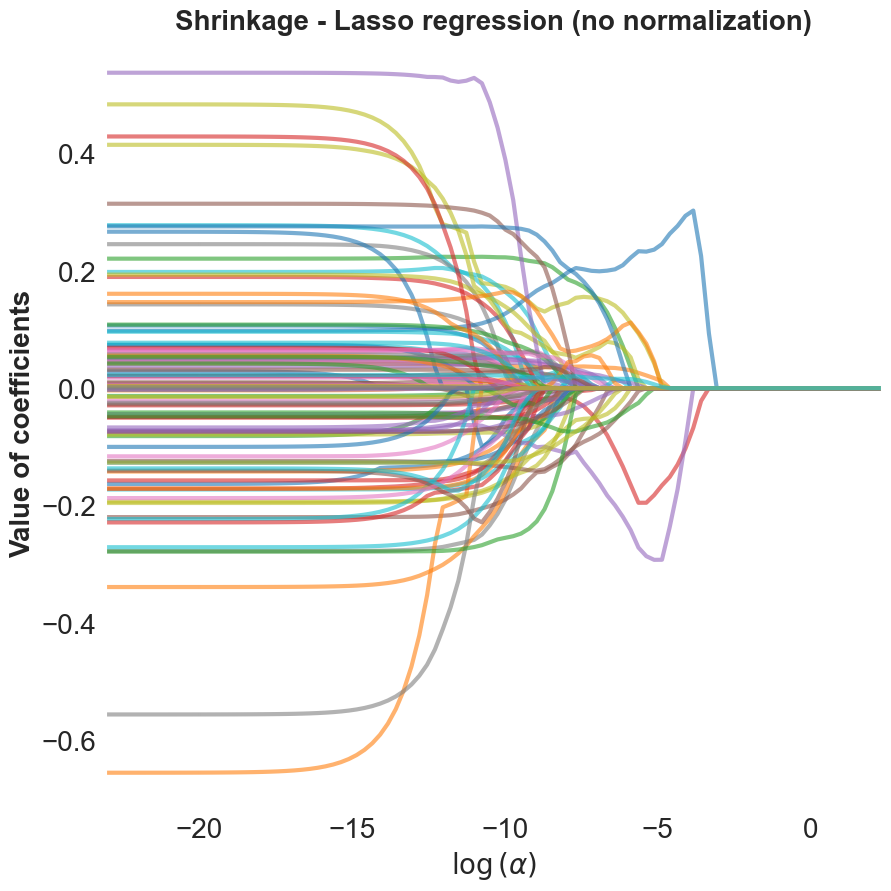

In [176]:
plot_lasso( nrows=1,
            ncols=1,
            tilte='Shrinkage - Lasso regression (no normalization)',
            xlabel='$\log \\left( \\alpha \\right)$',
            ylabel='Value of coefficients',
            subtilte='',
            lasso_alphas=lasso_alphas,
            coeff_df=coeff_df)

The most of the coefficients vanishes until alpha 0.01, three of the coefficients shrink much later, see which features are responsible for those:

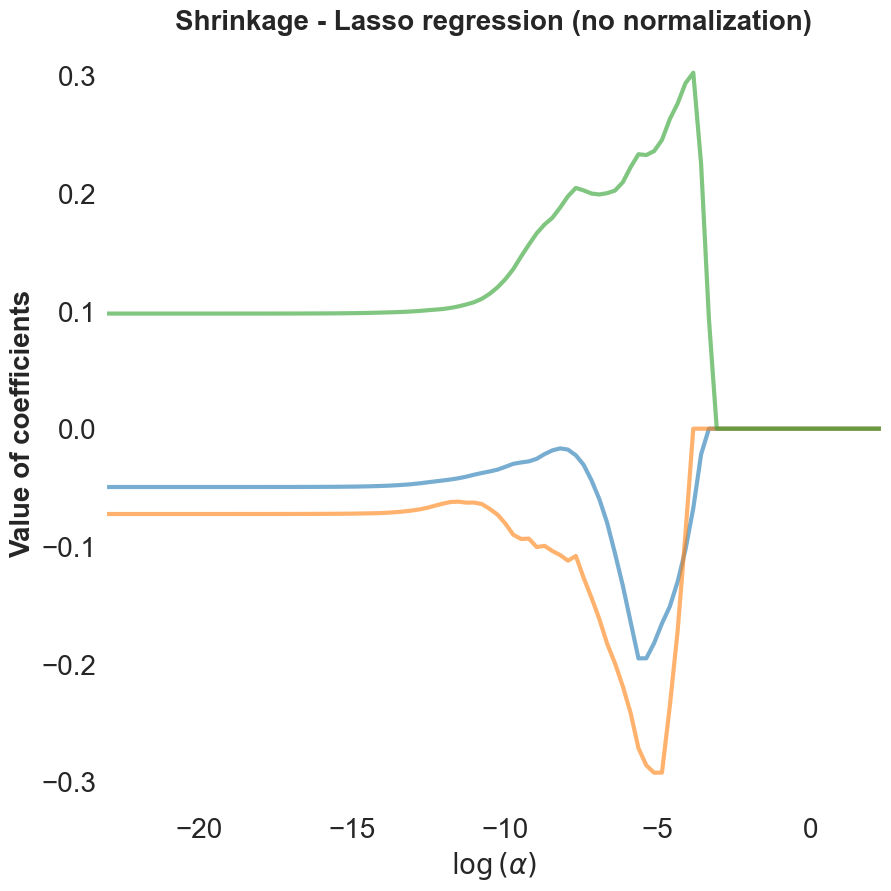

In [177]:
columns_to_keep= []
for i, j in enumerate(lasso_alphas):
    for k in coeff_df.columns:
        if coeff_df.iloc[i][f'{k}'] !=0 and j > 0.01 and f'{k}' not in columns_to_keep:
            columns_to_keep.append(f'{k}')
df_meaningful = coeff_df[columns_to_keep]


plot_lasso( nrows=1,
            ncols=1,
            tilte='Shrinkage - Lasso regression (no normalization)',
            xlabel='$\log \\left( \\alpha \\right)$',
            ylabel='Value of coefficients',
            subtilte='',
            lasso_alphas=lasso_alphas,
            coeff_df=df_meaningful)


After log alpha=-4 the only coefficients which are not eliminated:

PctKids2Par: percentage of kids in family housing with two parents
racePctWhite: percentage of population that is caucasian
PctIlleg: percentage of kids born to never married

In [179]:
lasso_alphas_norm, lasso_coeffs_norm = lasso(X_train, y_train, evaluate_lasso, normalize=True)

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Text(0.5, 0.03, ' ')

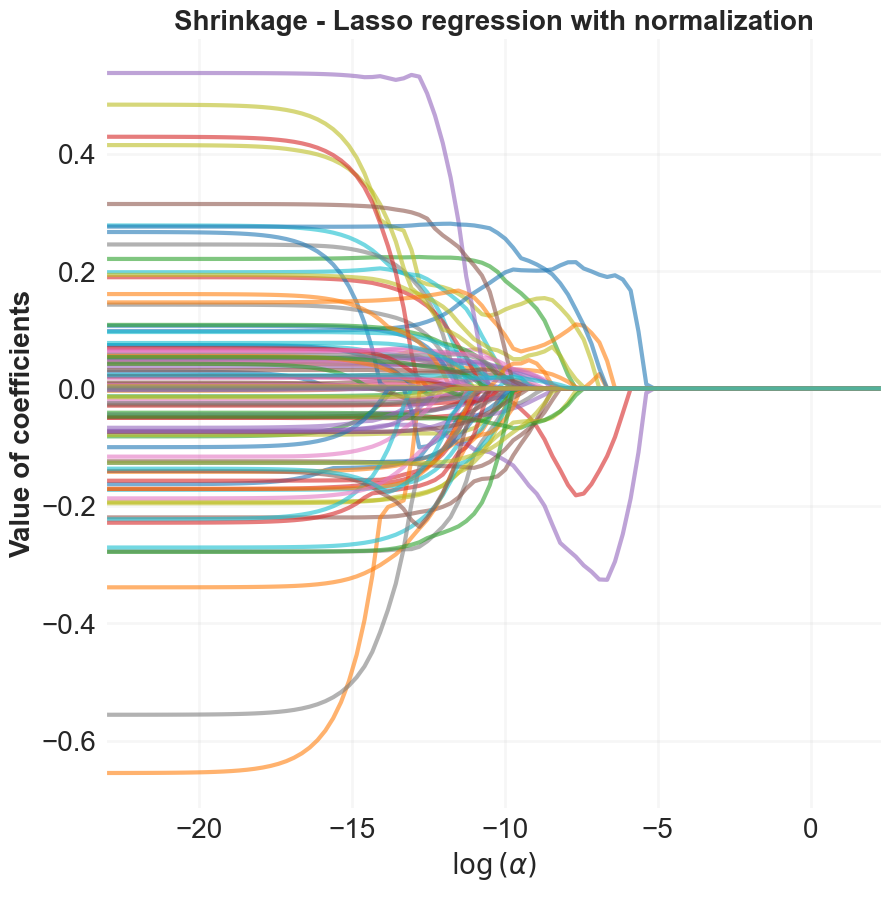

In [192]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10,nrows*10),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})


axes.set_xlim(np.log(lasso_alphas_norm.min()), np.log(lasso_alphas_norm.max()))
axes.set_title('Shrinkage - Lasso regression with normalization', fontsize=20, fontweight='bold')
axes.grid(color='lightgrey', linestyle='-', linewidth=2, alpha=0.2)
axes.set_xlabel('$\log \\left( \\alpha \\right)$', fontsize=20, fontweight='bold')
axes.set_ylabel('Value of coefficients', fontsize=20, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=20,)

axes.plot(np.log(lasso_alphas_norm), lasso_coeffs_norm , lw=3, alpha=0.6)


fig.suptitle(' ', fontsize=15, y=0.03)

In [193]:
from sklearn.linear_model import Ridge

In [194]:
def evaluate_ridge(X, y, alpha=1.0, normalize=False, max_iter=100000):

    model = Ridge(alpha=alpha, normalize=normalize, max_iter=max_iter,
                  random_state=None)
    model.fit(X, y)

    return model

In [195]:
ridge_alphas, ridge_coeffs = lasso(X_train, y_train, evaluate_ridge, normalize=True)

100%|██████████| 100/100 [00:00<00:00, 151.25it/s]


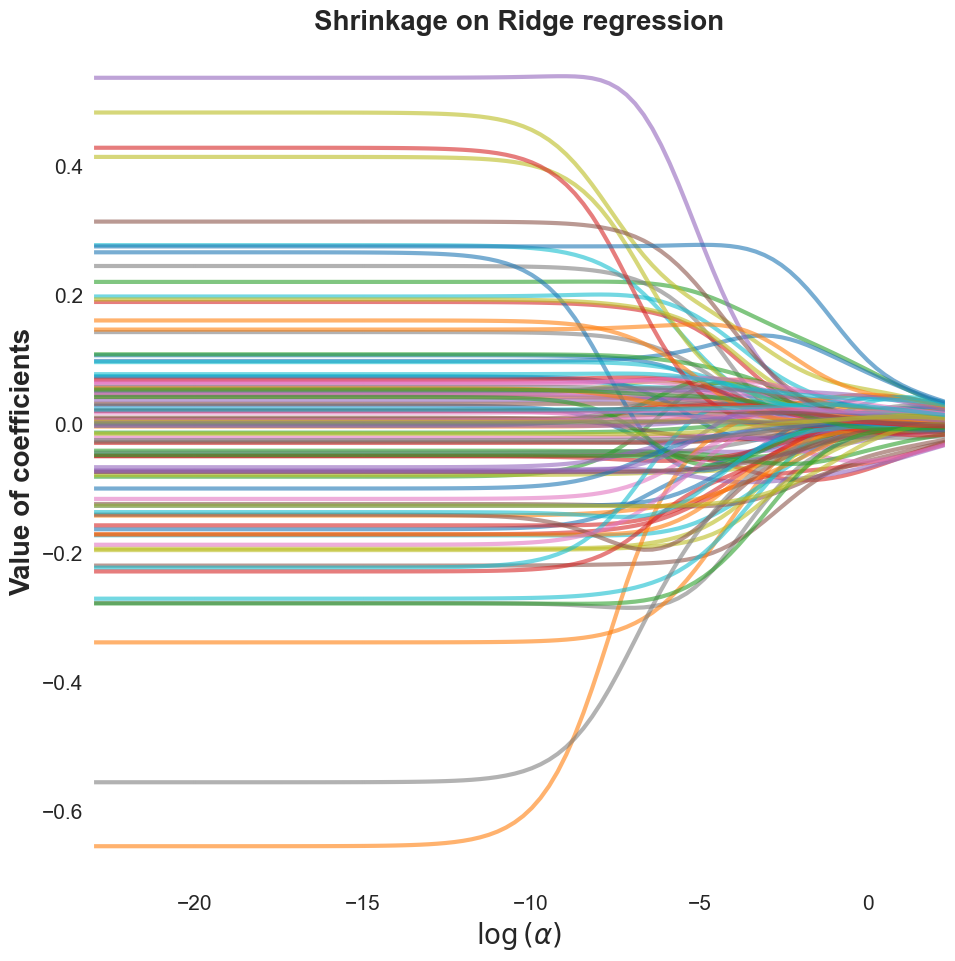

In [197]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*11,nrows*11),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})


axes.set_xlim(np.log(ridge_alphas.min()), np.log(ridge_alphas.max()))
axes.set_title('Shrinkage on Ridge regression', fontsize=20, fontweight='bold')

axes.plot(np.log(ridge_alphas), ridge_coeffs, lw=3, alpha=0.6)
axes.set_xlabel('$\log \\left( \\alpha \\right)$', fontsize=20, fontweight='bold')
axes.set_ylabel('Value of coefficients', fontsize=20, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=15)
axes.grid( linestyle='-', linewidth=2, alpha=0.2)

Lasso function has l1 regularization. Ridge function has l2 regularization.
For the l2 regularization we want to get exactly these very smooth curves.

# 4. Subset selection
Split the data to training and test sets and do recursice feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (RidgeCV, LassoCV, ElasticNetCV) on the training set, plot their names and look up some of their meanings [ recursive feature elimination is part of sklearn but you can do it with a for loop if you whish ]
Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the y_test on 3 different plots, which model seems to be the best?

In [198]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

RidgeCV

In [200]:
# 5-fold search
folds = 5
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# Create RidgeCV
ridge_cv = RidgeCV(normalize=True, cv=cv, alphas=np.logspace(-10, 1, 400))
# Create an RFE selection
rfe = RFE(estimator=ridge_cv, n_features_to_select=10, step=1)
# Fitting
rfe_ridge_model = rfe.fit(X_train, y_train)
# Predictions
ridge_prediction = rfe_ridge_model.predict(X_test)

In [201]:
# Selected features
features_selected = cleaned_df.columns[:-1][rfe_ridge_model.support_]
coef_selected = rfe_ridge_model.estimator_.coef_
# Sort them by coef_
coef_selected, features_selected = zip(*sorted(zip(coef_selected, features_selected), reverse=True))
# Calculate MAE and RMS
ridge_mae = np.mean(np.abs(y_test - ridge_prediction))
ridge_rms = np.sqrt(np.mean((y_test - ridge_prediction)**2))

In [202]:
print(f'Ridge Regression MAE: {ridge_mae:.4f}')
print(f'Ridge Regression RMS: {ridge_rms:.4f}')
print('Most prominent features:\n'+
      '---------------------------')
[print('{0} : {1:.4f}'.format(f, c)) for (f, c) in zip(features_selected, coef_selected)];

In [203]:
fig, axes = plt.subplots(figsize=(11,11),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})
axes.set_aspect('equal')

axes.plot([0, 1], [0, 1], lw=4, ls='--', zorder=3, alpha=0.5)

sc = 12
axes.scatter(y_test, ridge_prediction, s=sc**2, ec='black', alpha=0.4)

axes.set_xlim(0, 1)
axes.set_ylim(0, 1)

axes.set_title(f'MAE = {ridge_mae:.4f}  |  RMS = {ridge_rms:.4f}',
               fontsize=20, fontweight='bold')
axes.set_xlabel('$y$', fontsize=20, fontweight='semibold')
axes.set_ylabel('$\mathrm{y_{pred}}$', fontsize=20, fontweight='semibold')
axes.tick_params(axis='both', which='major', labelsize=15)
axes.grid( linestyle='-', linewidth=2, alpha=0.2)
fig.suptitle('Predictions made with the optimized 5-fold Ridge regression \nwith recursive feature selection', fontsize=15, y=0.03)

LassoCV

In [205]:
folds = 5
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
lasso_cv = LassoCV(normalize=True, cv=cv, alphas=np.logspace(-10, 1, 400), max_iter=10000)
rfe = RFE(estimator=lasso_cv, n_features_to_select=10, step=1)
rfe_lasso_model = rfe.fit(X_train, y_train)
lasso_prediction = rfe_lasso_model.predict(X_test)

In [206]:
features_selected = cleaned_df.columns[:-1][rfe_lasso_model.support_]

coef_selected = rfe_lasso_model.estimator_.coef_
coef_selected, features_selected = zip(*sorted(zip(coef_selected, features_selected), reverse=True))

lasso_mae = np.mean(np.abs(y_test - lasso_prediction))
lasso_rms = np.sqrt(np.mean((y_test - lasso_prediction)**2))

In [207]:
print(f'Lasso Regression MAE: {lasso_mae:.4f}')
print(f'Lasso Regression RMS: {lasso_rms:.4f}')
print('Most prominent features:\n'+
      '---------------------------')
[print('{0} : {1:.4f}'.format(f, c)) for (f, c) in zip(features_selected, coef_selected)];

Lasso Regression MAE: 0.0938
Lasso Regression RMS: 0.1321
Most prominent features:
---------------------------
MedRent : 0.2852
HousVacant : 0.2579
NumStreet : 0.2576
PctIlleg : 0.2190
PctPersDenseHous : 0.2096
MalePctDivorce : 0.1973
racepctblack : 0.1843
RentLowQ : -0.2211
NumIlleg : -0.2370
PctKids2Par : -0.2548


Text(0.5, 0.03, 'Predictions made with the optimized 5-fold Lasso regression \nwith recursive feature selection')

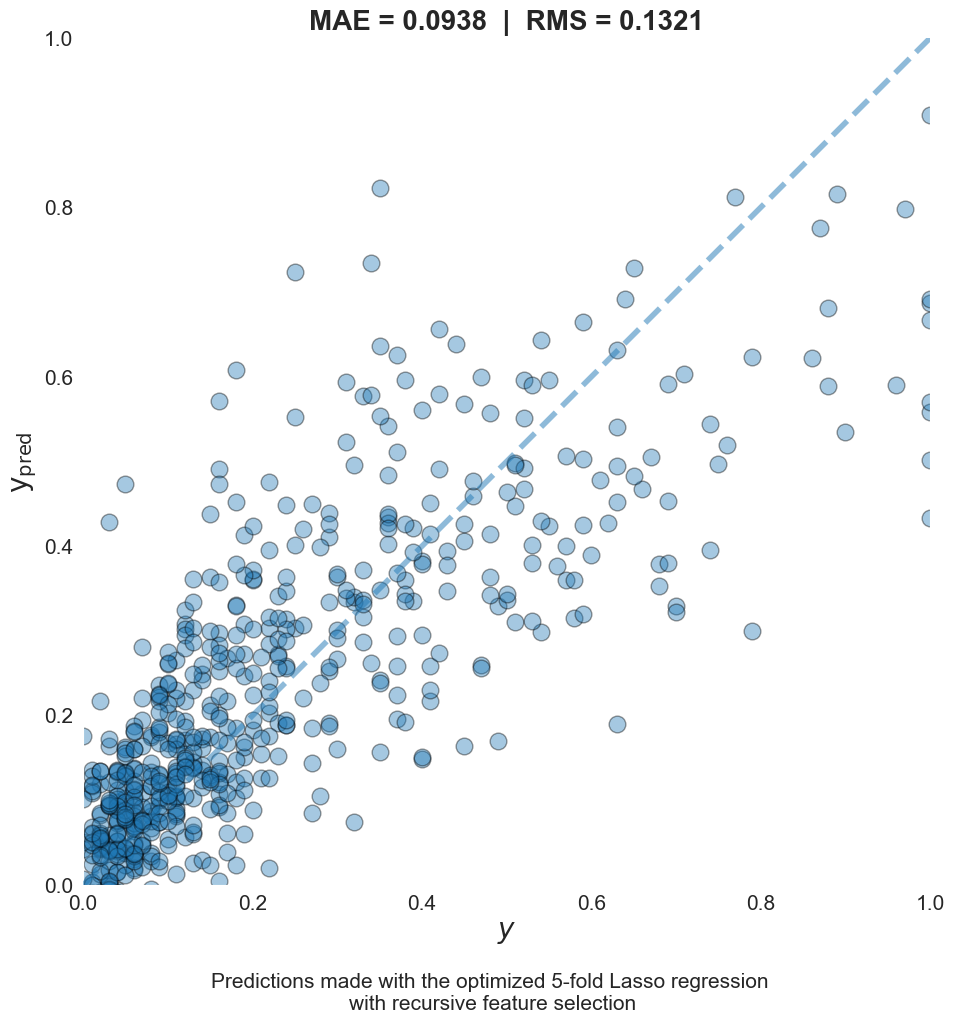

In [224]:
fig, axes = plt.subplots(figsize=(11,11),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})
axes.set_aspect('equal')

axes.plot([0, 1], [0, 1], lw=4, ls='--', zorder=3, alpha=0.5)

sc = 12
axes.scatter(y_test, lasso_prediction, s=sc**2, ec='black', alpha=0.4)

axes.set_xlim(0, 1)
axes.set_ylim(0, 1)

axes.set_title('MAE = {0:.4f}  |  RMS = {1:.4f}'.format(lasso_mae, lasso_rms),
               fontsize=20, fontweight='bold', )
axes.set_xlabel('$y$', fontsize=20, fontweight='semibold' )
axes.set_ylabel('$\mathrm{y_{pred}}$', fontsize=20, fontweight='semibold', )
axes.tick_params(axis='both', which='major', labelsize=15, )
axes.grid( linestyle='-', linewidth=2, alpha=0.2)
fig.suptitle('Predictions made with the optimized 5-fold Lasso regression \nwith recursive feature selection', fontsize=15, y=0.03)

ElasticNetCV

In [209]:
# 5-fold search is needed
folds = 5
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# Create ElasticNetCV model
elastic_net_cv = ElasticNetCV(normalize=True, cv=cv, alphas=np.logspace(-10, 1, 400), max_iter=10000)
# Create an RFE selection
rfe = RFE(estimator=elastic_net_cv, n_features_to_select=10, step=1)
# Fit the selection with the 5-fold ElasticNet C-V as an estimator
rfe_elastic_net_model = rfe.fit(X_train, y_train)
# Get predictions
elastic_net_prediction = rfe_elastic_net_model.predict(X_test)

In [211]:
# Selected features
features_selected = cleaned_df.columns[:-1][rfe_elastic_net_model.support_]
coef_selected = rfe_elastic_net_model.estimator_.coef_
# Sort them by coef_
coef_selected, features_selected = zip(*sorted(zip(coef_selected, features_selected), reverse=True))
# Calculate MAE and RMS
elastic_net_mae = np.mean(np.abs(y_test - elastic_net_prediction))
elastic_net_rms = np.sqrt(np.mean((y_test - elastic_net_prediction)**2))

Text(0.5, 0.03, 'Predictions made with the optimized 5-fold ElasticNet regression \nwith recursive feature selection')

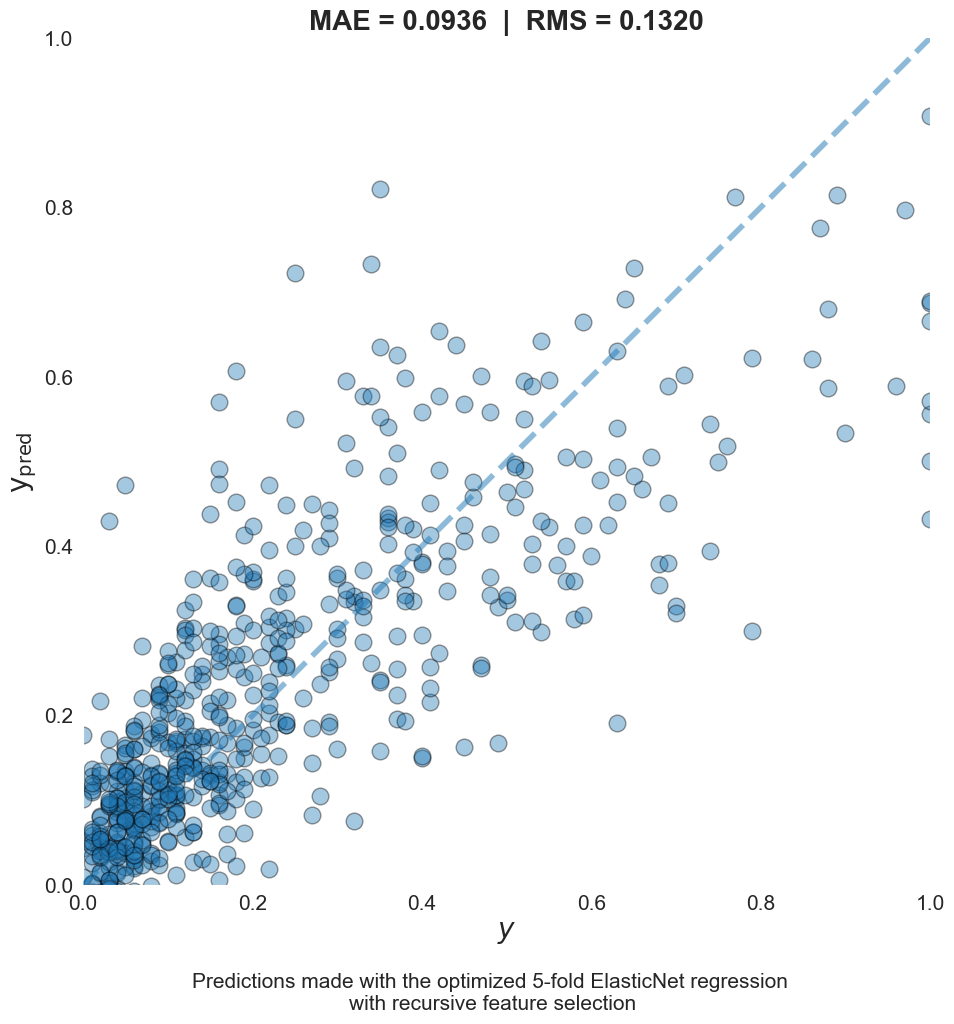

In [225]:
fig, axes = plt.subplots(figsize=(11,11),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})
axes.set_aspect('equal')

axes.plot([0, 1], [0, 1], lw=4, ls='--', zorder=3, alpha=0.5)

sc = 12
axes.scatter(y_test, elastic_net_prediction, s=sc**2, ec='black', alpha=0.4)

axes.set_xlim(0, 1)
axes.set_ylim(0, 1)

axes.set_title('MAE = {0:.4f}  |  RMS = {1:.4f}'.format(elastic_net_mae, elastic_net_rms),
               fontsize=20, fontweight='bold', )
axes.set_xlabel('$y$', fontsize=20, fontweight='semibold', )
axes.set_ylabel('$\mathrm{y_{pred}}$', fontsize=20, fontweight='semibold',)
axes.tick_params(axis='both', which='major', labelsize=15, )
axes.grid(linestyle='-', linewidth=2, alpha=0.2)

fig.suptitle('Predictions made with the optimized 5-fold ElasticNet regression \nwith recursive feature selection', fontsize=15, y=0.03)

In [213]:
print(f'ElasticNet Regression MAE: {elastic_net_mae:.4f}')
print(f'ElasticNet Regression RMS: {elastic_net_rms:.4f}')
print('Most prominent features:\n'+
      '---------------------------')
[print('{0} : {1:.4f}'.format(f, c)) for (f, c) in zip(features_selected, coef_selected)];

ElasticNet Regression MAE: 0.0936
ElasticNet Regression RMS: 0.1320
Most prominent features:
---------------------------
MedRent : 0.2636
NumStreet : 0.2556
HousVacant : 0.2532
PctIlleg : 0.2184
PctPersDenseHous : 0.2078
MalePctDivorce : 0.1947
racepctblack : 0.1847
RentLowQ : -0.2009
NumIlleg : -0.2277
PctKids2Par : -0.2551


In [214]:
from sklearn.metrics import r2_score

lasso_r2 = r2_score(y_test, lasso_prediction)
ridge_r2 = r2_score(y_test, ridge_prediction)
elastic_r2 = r2_score(y_test, elastic_net_prediction)

In [215]:
print('R2 score of Lasso:', lasso_r2)
print('R2 score of Ridge:', ridge_r2)
print('R2 score of ElasticNet:', elastic_r2)

R2 score of Lasso: 0.6354645658132312
R2 score of Ridge: 0.6358925319588464
R2 score of ElasticNet: 0.6359419405013603


Based on the results ElasticNet is the best, but only slightly.

# 5. ElasticNet penalty surface
visualize the surface of the objective(alpha, beta) parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: from scipy.optimize import minimize)
this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters alpha, beta
interpret the overall results, do you think regularization is necessary at all? do you think linear models are powerful enough on this dataset?

In [216]:
from sklearn.linear_model import ElasticNet
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [217]:
a = np.linspace(0.00001, 0.05, 100)
b = np.linspace(0.00001, 1, 100)

x, y = np.meshgrid(a, b)

mse = []

for i, j in zip(np.ravel(x), np.ravel(y)):
    elastic_net = ElasticNet(alpha=i+j, l1_ratio=i/(i+j)).fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, elastic_net.predict(X_test)))

mse = np.array(mse)

In [218]:
import plotly.graph_objects as go
z = mse.reshape(x.shape)

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='ElasticNet Penalty Surface plot', autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

I am not sure if the above plot will be properly displayed in the HTML version, I made a 2D version as well:

Text(0, 0.5, 'y')

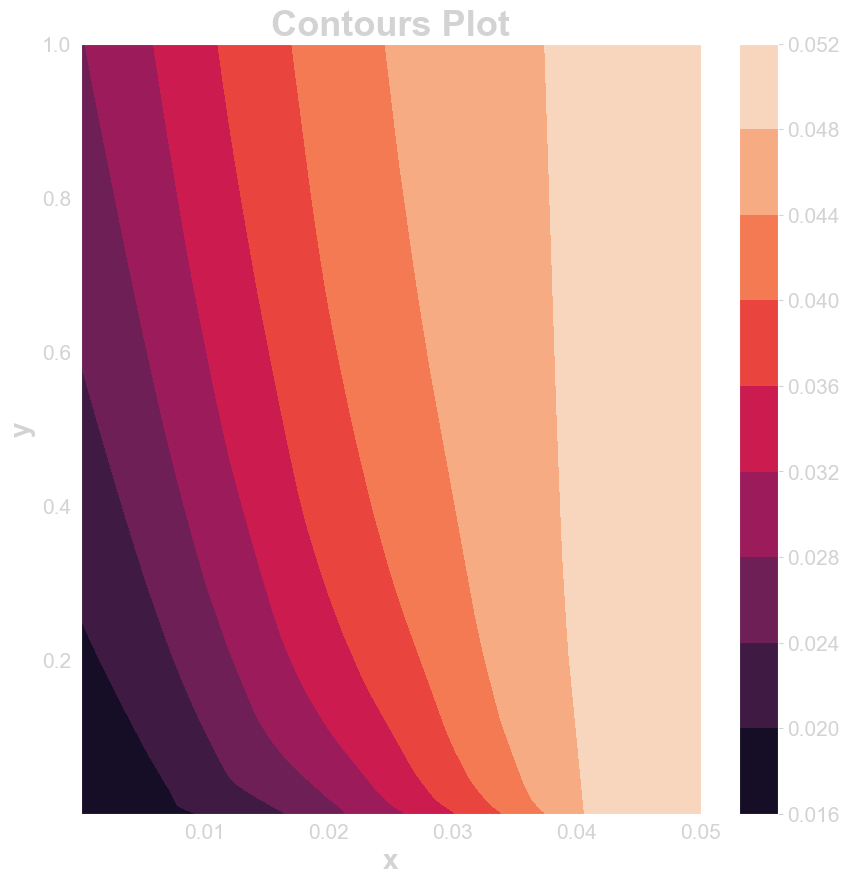

In [219]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10,nrows*10),
                         facecolor='None', subplot_kw={'facecolor' : 'None'})
cp = axes.contourf(x, y, z)
axes.tick_params(axis='both', which='major', labelsize=15, colors='lightgray')
axes.grid(color='lightgrey', linestyle='-', linewidth=2, alpha=0.2)
cbar = fig.colorbar(cp) # Add a colorbar to a plot
axes.set_title('Contours Plot', fontsize=26, fontweight='bold', color='lightgrey')
cbar.ax.tick_params(labelsize=15, colors='Lightgrey')
axes.set_xlabel('x', fontsize=20, fontweight='semibold', color='lightgray')
axes.set_ylabel('y', fontsize=20, fontweight='semibold', color='lightgray')

In [220]:
def elastic_mse(k):
    a = k[0]
    b = k[1]

    elastic_net = ElasticNet(alpha=a+b, l1_ratio=a/(a+b)).fit(X_train, y_train)
    mse = mean_squared_error(y_test, elastic_net.predict(X_test))

    return mse

In [221]:
k = [0.00001, 0.001]
bnds = ((0, None), (0, None))
res = minimize(elastic_mse, k, bounds=bnds)
res.x

array([0.00136457, 0.        ])

In [222]:
# l1 = 0.00136457/0.00136457+0
# alpha = 0.00136457 + 0
elastic_net = ElasticNet(alpha=0.00136457, l1_ratio=1).fit(X_train, y_train)
score = elastic_net.score(X_test, y_test)
mse = mean_squared_error(y_test, elastic_net.predict(X_test))
print(f'R2:{score:.4f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}')

R2:0.6467, MSE:0.0169, RMSE:0.1301


The optimal values of the penalties are almost zeros, so based on these I think regularization is not needed here.